In [2]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# Define the file paths for the signal and background data
signal_file={"signal":"/home/bhanda25/Phys323_fall2024/ML_root_file/ntuple_4mu_VV.root"}
background_file={"background": "/home/bhanda25/Phys323_fall2024/ML_root_file/ntuple_4mu_VV.root"}

# Define the variables (features) you want to extract from the ROOT files
VARS= ["f_mass4l", "f_massjj"]

dict_items([('signal', '/home/bhanda25/Phys323_fall2024/ML_root_file/ntuple_4mu_VV.root')])

In [26]:

df_signal = []
for key, file in signal_file.items():
    upfile = uproot.open(file)
    df = upfile["HZZ4LeptonsAnalysisReduced"].arrays(VARS, library="pd")
    df = df[(df[VARS[0]] > -999) & (df[VARS[1]] > -999)]
    df["isSignal"] = np.ones(len(df))
    df_signal.append(df)
    
df_background=[]
for key, file in background_file.items():
    upfile = uproot.open(file)
    df = upfile["HZZ4LeptonsAnalysisReduced"].arrays(VARS, library="pd")
    df = df[(df[VARS[0]] > -999) & (df[VARS[1]] > -999)]
    df["isSignal"] = np.zeros(len(df))
    df_background.append(df)


In [29]:
# df_all is now a combined DataFrame containing both signal and background data.
# It has a column "isSignal" where 1.0 represents signal and 0.0 represents background.
df_all=pd.concat(df_signal+df_background)
df_all

,f_mass4l,f_massjj,isSignal
0,125.077103,1300.426880,1.0
1,124.238113,437.221863,1.0
3,124.480667,1021.744080,1.0
4,124.919464,1101.381958,1.0
7,125.049065,498.717194,1.0
...,...,...,...
25809,117.123833,295.388397,0.0
25810,124.413208,1859.657593,0.0
25812,127.182854,532.784241,0.0
25815,124.465851,773.501160,0.0


In [32]:
# Separate signal and background based on the 'isSignal' column
signal_data = df_all[df_all['isSignal'] == 1.0]  # Selecting signal data where isSignal is 1
background_data = df_all[df_all['isSignal'] == 0.0]  # Selecting background data where isSignal is 0

# Now we plot the data for signal and background for both f_mass4l and f_massjj

signal_data

,f_mass4l,f_massjj,isSignal
0,125.077103,1300.426880,1.0
1,124.238113,437.221863,1.0
3,124.480667,1021.744080,1.0
4,124.919464,1101.381958,1.0
7,125.049065,498.717194,1.0
...,...,...,...
25809,117.123833,295.388397,1.0
25810,124.413208,1859.657593,1.0
25812,127.182854,532.784241,1.0
25815,124.465851,773.501160,1.0


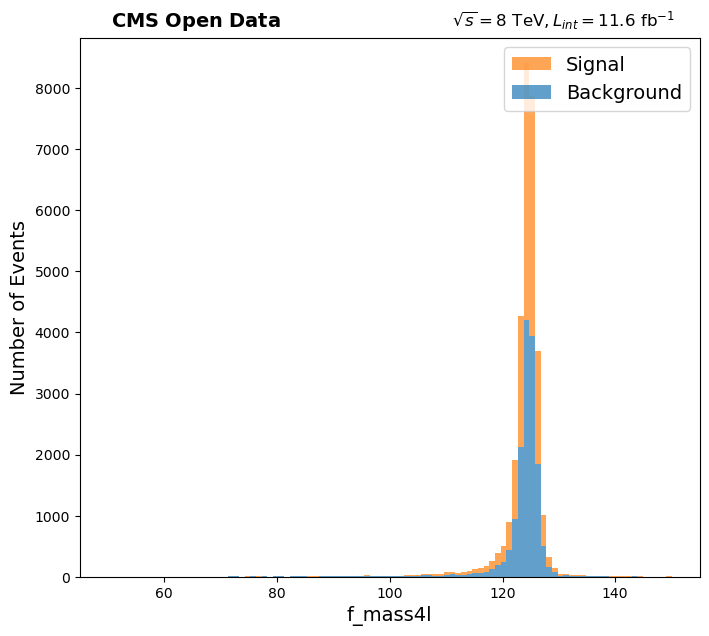

In [43]:
# Split the data into signal and background
signal_data = df_all[df_all['isSignal'] == 1.0]  # Signal data where isSignal is 1
background_data = df_all[df_all['isSignal'] == 0.0]  # Background data where isSignal is 0

# Create histogram bins
bins = np.linspace(50, 150, 100)  # Generates 50 evenly spaced values between 0 to 200

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(8, 7))  # This sets up the plotting area with a width of 8 inches and a height of 7 inches

# Plot the background and signal as a stacked histogram
# Background first, then signal to ensure signal is on top
ax.hist([background_data[VARS[0]], signal_data[VARS[0]]], bins=bins, histtype='stepfilled', label=['Background', 'Signal'], 
        alpha=0.7, stacked=True, linewidth=2)

# Add labels and title
ax.set_xlabel('f_mass4l', fontsize=14)
ax.set_ylabel('Number of Events', fontsize=14)

# CMS-style text
ax.text(0.05, 1.02, r'$\mathbf{CMS \ Open \ Data}$', transform=ax.transAxes, fontsize=14)
ax.text(0.6, 1.02, r'$\sqrt{s} = 8 \ \mathrm{TeV}, L_{int} = 11.6 \ \mathrm{fb}^{-1}$', transform=ax.transAxes, fontsize=12)

# Add a legend
ax.legend(loc='upper right', fontsize=14)

# Display the plot
plt.show()

In [ ]:
# Plot the histogram for f_massjj
plt.figure(figsize=(5, 4), dpi=100)

# Define bins and plot histograms for both background and signal
bins_massjj = np.linspace(0, 2000, 100)

# Plot background for f_massjj
plt.hist(background_data[VARS[1]], bins=bins_massjj, alpha=1, label="Background", histtype="step", color="red")

# Plot signal for f_massjj
plt.hist(signal_data[VARS[1]], bins=bins_massjj, alpha=1, label="Signal", histtype="step", color="blue")

# Add plot details
plt.legend(loc="upper right")
plt.xlim(0, 2000)
plt.xlabel(VARS[1])  # Label for f_massjj
plt.ylabel("Counts")
plt.title(f"Histogram of {VARS[1]}: Signal vs Background")

# Display the plot
plt.show()